In [148]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [149]:
#realizando a leitura do arquivo (dataset)
df= pd.read_csv('comp_bikes_mod.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


<h2> Visão Geral Do Dataset</h2>

In [216]:
#quantidade de valores nulos na coluna "temp"]
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       15641 non-null float64
dteday        15641 non-null object
season        15641 non-null float64
yr            15641 non-null float64
mnth          15641 non-null float64
hr            15641 non-null float64
holiday       15641 non-null float64
weekday       15641 non-null float64
workingday    15641 non-null float64
weathersit    15641 non-null float64
temp          15641 non-null float64
atemp         15641 non-null float64
hum           15641 non-null float64
windspeed     15641 non-null float64
casual        15641 non-null float64
registered    15641 non-null float64
cnt           15641 non-null float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

<h2> Tratamento Dados NaN de Coluna "dteday" e Estatística Geral </h2>

In [217]:
# retirada de linhas com valores nulos na coluna "dteday"
df_dt=df.dropna(axis=0,subset=['dteday'])
df_dt

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [152]:
# estatísticas geral do dataframe
df_dt.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<h3>Identificação de Outliers</h3>

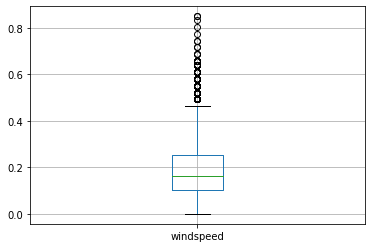

In [218]:
#identificando possíveis outliers para 'windspeed'
df_dt[['windspeed']].boxplot()

<h2> Matriz de Correção do Dataframe</h2>

In [154]:
#criando matriz de correlação - df_dt + colunas season / temp / atemp / hum / windspeed
df_dt

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [155]:
df_cor=df_dt.drop(columns=['instant','yr','mnth','hr','holiday','weekday','workingday','weathersit','casual','registered'])
df_cor

,dteday,season,temp,atemp,hum,windspeed,cnt
1,2011-01-01,1.0,0.22,0.2727,0.80,0.0000,40.0
2,2011-01-01,1.0,0.22,0.2727,0.80,0.0000,32.0
3,2011-01-01,1.0,0.24,0.2879,0.75,0.0000,13.0
4,2011-01-01,1.0,0.24,0.2879,0.75,0.0000,1.0
5,2011-01-01,1.0,0.24,0.2576,0.75,0.0896,1.0
...,...,...,...,...,...,...,...
17373,2012-12-31,1.0,0.26,NaN,0.48,0.1343,122.0
17374,2012-12-31,NaN,0.26,0.2576,0.60,0.1642,119.0
17375,2012-12-31,1.0,0.26,0.2576,0.60,0.1642,89.0
17377,2012-12-31,1.0,0.26,0.2727,0.56,0.1343,61.0


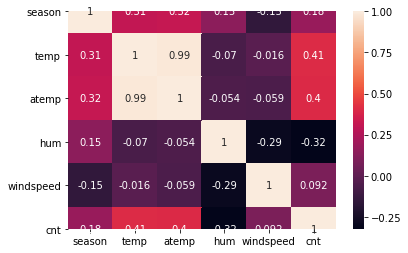

In [156]:
corrMatrix = df_cor.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<h2> Regressão Linear com valores médios para dados NaN</h2>

In [210]:
# calculando regressão linear para df_dt com valores médios

# substituindo valores médios para as colunas hum / cnt / casual
df_mean=df_dt.loc[:,['hum','casual','cnt']]
df_mean

,hum,casual,cnt
1,0.80,8.0,40.0
2,0.80,5.0,32.0
3,0.75,3.0,13.0
4,0.75,0.0,1.0
5,0.75,0.0,1.0
...,...,...,...
17373,0.48,10.0,122.0
17374,0.60,11.0,119.0
17375,0.60,NaN,89.0
17377,0.56,13.0,61.0


In [211]:
# valores médios de cada coluna
df_mean.mean()

hum         0.627357
casual     35.416317
cnt       189.165850
dtype: float64

In [212]:
df_tratado=df_mean.fillna(df_mean.mean())
df_tratado

,hum,casual,cnt
1,0.80,8.000000,40.0
2,0.80,5.000000,32.0
3,0.75,3.000000,13.0
4,0.75,0.000000,1.0
5,0.75,0.000000,1.0
...,...,...,...
17373,0.48,10.000000,122.0
17374,0.60,11.000000,119.0
17375,0.60,35.416317,89.0
17377,0.56,13.000000,61.0


In [213]:
##realizando a análise de regressão linear

#Separando entre features e labels
X=df_tratado.drop(columns='cnt')
y=df_tratado.loc[:,'cnt']

In [214]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
regressao= reg.fit (X,y) # encontra os coeficientes (realiza a regressão)

#realiza a previsão
previsao=reg.predict(X)

In [215]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-99.75012328   2.21512197]X 173.2933750513558
Coeficiente de Determinação (R2): 0.4059859251122173
